In [1]:
# ROBERT HEETER
# ELEC 378 Machine Learning
# 7 April 2023

# PROBLEM SET 9


In [2]:
# PROBLEM 1

import numpy as np
from matplotlib import pyplot as plt

import scipy.io
import random

# load files
train1 = scipy.io.loadmat('Train1.mat')
train2 = scipy.io.loadmat('Train2.mat')


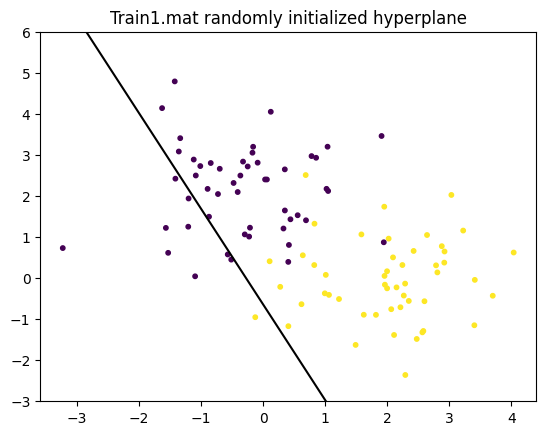

In [3]:
# PART A

# load Train1.mat data
X = train1['X'] # X = data matrix w/ shape (n, p)
y = train1['y'] # Y = labels (±1)

# dimensions of X
n = train1['n'][0][0]
p = train1['p'][0][0]

T = 200 # T = number of iterations for subgradient descent

# initalize w_0 and b_0 to random values
w_0 = np.array([random.uniform(-2,2) for _ in range(p)]).reshape(p,)
b_0 = random.random()

w_s = np.zeros((T+1,p)) # w_s[i] = weights after ith iteration of subgradient descent
b_s = np.zeros((T+1,)) # b_s[i] = intercept after ith iteration of subgradient descent
w_s[0] = w_0
b_s[0] = b_0

w_s_stochastic = w_s # save for part D later
b_s_stochastic = b_s

# plot hyperplane function
def plot_hyperplane_2d(x_axis, w, b, c='k'):
    slope = -1*w[0]/w[1]
    intercept = -1*b/w[1]
    plt.plot(x_axis, (x_axis*slope)+intercept, color=c)

# calculate misclassification error function
def misclassification_error_2d(X, y, w, b):
    slope = -1*w[0]/w[1]
    intercept = -1*b/w[1]

    count = 0 # error count
    for i in range(len(y)):
        y_value = (X[i,0]*slope)+intercept
        
        if X[i,1] > y_value:
            y_pred = -1
        else:
            y_pred = 1
        
        y_label = y[i]
        if y_pred != y_label:
            count += 1
    return (count/len(y))*100

# create x-axis values to plot hyperplane   
x_axis = np.linspace(np.min(X[:,0]), np.max(X[:,0]), n)

# plot randomly-initialized hyperplane
plt.figure()
plt.scatter(X[:,0], X[:,1], c=y, s=10)
plot_hyperplane_2d(x_axis, w_s[0], b_s[0])
plt.ylim(-3,6)
plt.title(f'Train1.mat randomly initialized hyperplane')
plt.show()


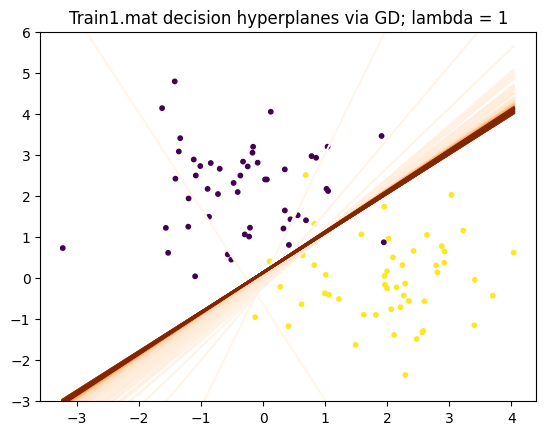

MISCLASSIFICATION ERROR RATE: 5.0%


In [4]:
# PART B

# plot sequence of hyperplanes
plt.figure()
plt.scatter(X[:,0], X[:,1], c=y, s=10)

colors = plt.cm.Oranges(np.linspace(0,1,T+1))

la = 1 # la = lambda/constraint
mu = 0.01 # mu = learning rate
y = y.reshape(n,)

# gradient descent
for t in range(T):
    plot_hyperplane_2d(x_axis, w_s[t], b_s[t], colors[t])
    
    y_pred = np.dot(X, w_s[t]) + b_s[t]
    s_b = np.where(y * y_pred < 1, -y, 0)
    
    s_w_sum = np.dot(X.T, s_b)
    w_subgrad = s_w_sum + (2*la*w_s[t])
    
    b_subgrad = np.sum(s_b)
    
    w_s[t+1] = w_s[t] - (mu * w_subgrad)
    b_s[t+1] = b_s[t] - (mu * b_subgrad)

# plot final hyperplane
plot_hyperplane_2d(x_axis, w_s[T], b_s[T], colors[T])

plt.ylim(-3,6)
plt.title(f'Train1.mat decision hyperplanes via GD; lambda = {la}')
plt.show()

# calculate misclassification error
error = misclassification_error_2d(X, y, w_s[T], b_s[T])
print(f'MISCLASSIFICATION ERROR RATE: {error}%')


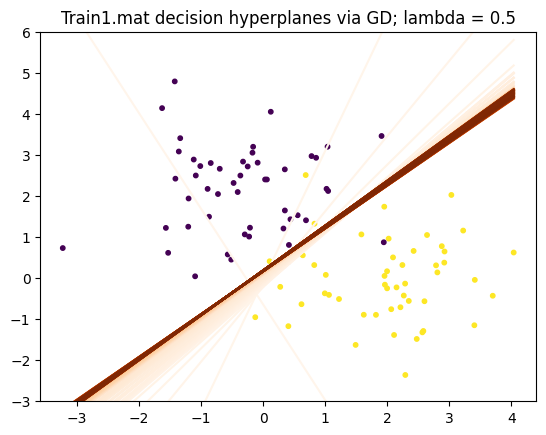

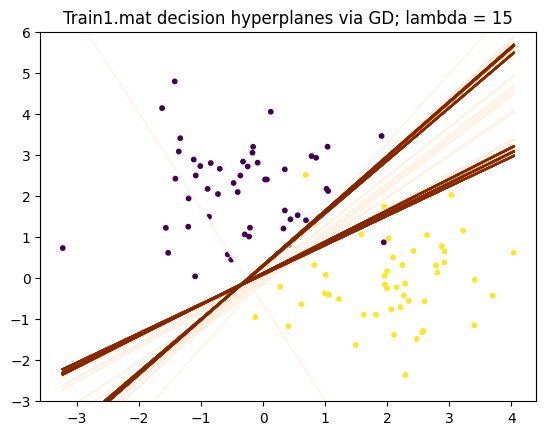

In [5]:
# PART C

for la in [0.5,15]: # la = lambda/constraint

    # plot sequence of hyperplanes
    plt.figure()
    plt.scatter(X[:,0], X[:,1], c=y, s=10)

    colors = plt.cm.Oranges(np.linspace(0,1,T+1))

    mu = 0.01 # mu = learning rate
    y = y.reshape(n,)

    # gradient descent
    for t in range(T):
        plot_hyperplane_2d(x_axis, w_s[t], b_s[t], colors[t])

        y_pred = np.dot(X, w_s[t]) + b_s[t]
        s_b = np.where(y * y_pred < 1, -y, 0)

        s_w_sum = np.dot(X.T, s_b)
        w_subgrad = s_w_sum + (2*la*w_s[t])

        b_subgrad = np.sum(s_b)

        w_s[t+1] = w_s[t] - (mu * w_subgrad)
        b_s[t+1] = b_s[t] - (mu * b_subgrad)
    
    # plot final hyperplane
    plot_hyperplane_2d(x_axis, w_s[T], b_s[T], colors[T])

    plt.ylim(-3,6)
    plt.title(f'Train1.mat decision hyperplanes via GD; lambda = {la}')
    plt.show()
    

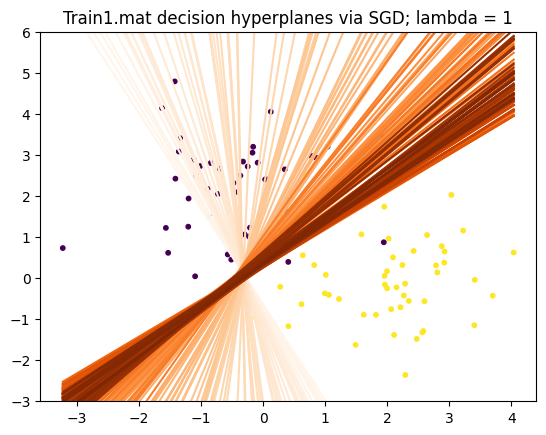

MISCLASSIFICATION ERROR RATE: 4.0%


In [6]:
# PART D

w_s = w_s_stochastic
b_s = b_s_stochastic

# plot sequence of hyperplanes
plt.figure()
plt.scatter(X[:,0], X[:,1], c=y, s=10)

colors = plt.cm.Oranges(np.linspace(0,1,T+1))

la = 1 # la = lambda/constraint
mu = 0.01 # mu = learning rate
y = y.reshape(n,)

# stochastic gradient descent
for t in range(T):    
    subset = np.random.choice(X.shape[0], size=1, replace=False)
    X_subset = X[subset]
    y_subset = y[subset]

    plot_hyperplane_2d(x_axis, w_s[t], b_s[t], colors[t])

    y_pred = np.dot(X_subset, w_s[t]) + b_s[t]
    s_b = np.where(y_subset * y_pred < 1, -y_subset, 0)
    
    s_w_sum = np.dot(X_subset.T, s_b)
    w_subgrad = s_w_sum + (2*la*w_s[t])
    
    b_subgrad = np.sum(s_b)
    
    w_s[t+1] = w_s[t] - (mu * w_subgrad)
    b_s[t+1] = b_s[t] - (mu * b_subgrad)

# plot final hyperplane
plot_hyperplane_2d(x_axis, w_s[T], b_s[T], colors[T])

plt.ylim(-3,6)
plt.title(f'Train1.mat decision hyperplanes via SGD; lambda = {la}')
plt.show()

# calculate misclassification error
error = misclassification_error_2d(X, y, w_s[T], b_s[T])
print(f'MISCLASSIFICATION ERROR RATE: {error}%')


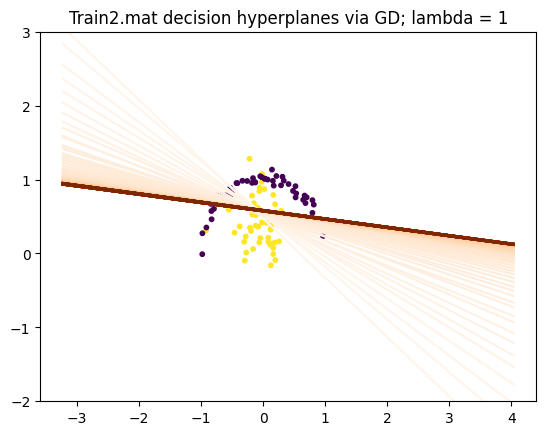

MISCLASSIFICATION ERROR RATE: 24.0%


In [7]:
# PART E

# load Train2.mat data
X = train2['X'] # X = data matrix w/ shape (n, p)
y = train2['y'] # Y = labels (±1)

# dimensions of X
n = train1['n'][0][0]
p = train1['p'][0][0]

T = 200 # T = number of iterations for subgradient descent

# initalize w_0 and b_0 to random values
w_0 = np.array([random.uniform(-2,2) for _ in range(p)]).reshape(p,)
b_0 = random.random()

w_s = np.zeros((T+1,p)) # w_s[i] = weights after ith iteration of subgradient descent
b_s = np.zeros((T+1,)) # b_s[i] = intercept after ith iteration of subgradient descent
w_s[0] = w_0
b_s[0] = b_0

# plot sequence of hyperplanes
plt.figure()
plt.scatter(X[:,0], X[:,1], c=y, s=10)

colors = plt.cm.Oranges(np.linspace(0,1,T+1))

la = 1 # la = lambda/constraint
mu = 0.01 # mu = learning rate
y = y.reshape(n,)

# gradient descent
for t in range(T):
    plot_hyperplane_2d(x_axis, w_s[t], b_s[t], colors[t])
    
    y_pred = np.dot(X, w_s[t]) + b_s[t]
    s_b = np.where(y * y_pred < 1, -y, 0)
    
    s_w_sum = np.dot(X.T, s_b)
    w_subgrad = s_w_sum + (2*la*w_s[t])
    
    b_subgrad = np.sum(s_b)
    
    w_s[t+1] = w_s[t] - (mu * w_subgrad)
    b_s[t+1] = b_s[t] - (mu * b_subgrad)

# plot final hyperplane
plot_hyperplane_2d(x_axis, w_s[T], b_s[T], colors[T])

plt.ylim(-2,3)
plt.title(f'Train2.mat decision hyperplanes via GD; lambda = {la}')
plt.show()

# calculate misclassification error
error = misclassification_error_2d(X, y, w_s[T], b_s[T])
print(f'MISCLASSIFICATION ERROR RATE: {error}%')


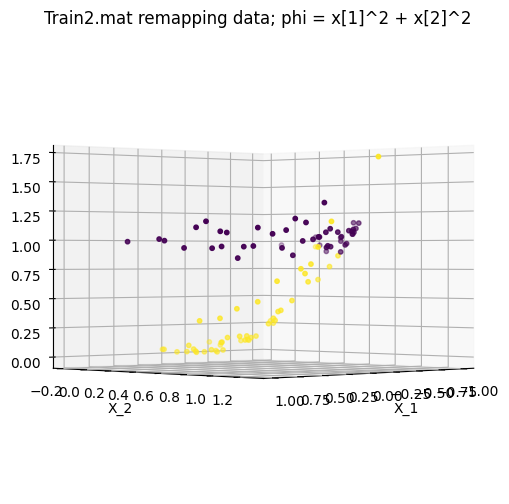

In [8]:
# PART F

# load Train2.mat data
X = train2['X'] # X = data matrix w/ shape (n, p)
y = train2['y'] # Y = labels (±1)

# dimensions of X
n = train1['n'][0][0]
p = train1['p'][0][0]

# add third column with nonlinear function phi = x[1]^2 + x[2]^2
p = 3
X_mod = np.zeros((n,p))
X_mod[:,0:2] = X

phi = X[:,0]**2 + X[:,1]**2
X_mod[:,2] = phi

X = X_mod

# plot new data
fig = plt.figure(figsize = (7, 6))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('X_1'); ax.set_ylabel('X_2'); ax.set_zlabel('X_3 (phi)')
ax.scatter(X[:,0], X[:,1], X[:,2], c=y, s=10)

ax.view_init(elev=0, azim=45)
plt.title(f'Train2.mat remapping data; phi = x[1]^2 + x[2]^2')
plt.show()


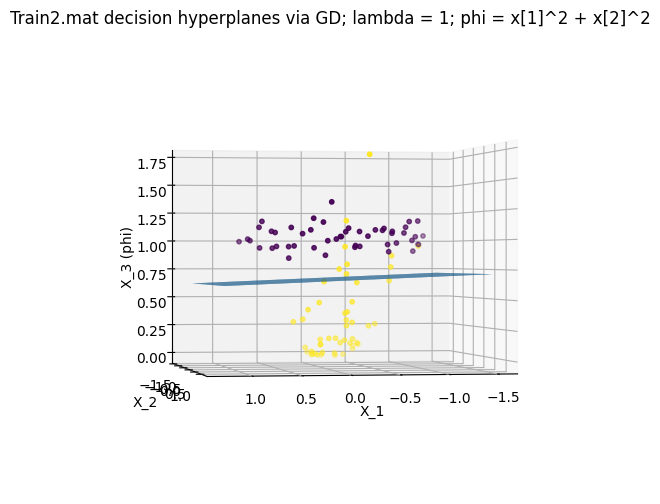

MISCLASSIFICATION ERROR RATE: 9.0%


In [9]:
# PART G

# calculate misclassification error function
def misclassification_error_3d(X, y, w, b):
    count = 0 # error count
    for i in range(len(y)):
        y_value = 1/w[2]*((-1*X[i,0]*w[0]) + (-1*X[i,1]*w[1]) - b)
        
        if X[i,2] > y_value:
            y_pred = -1
        else:
            y_pred = 1
        
        y_label = y[i]
        if y_pred != y_label:
            count += 1
    return (count/len(y))*100

T = 400 # T = number of iterations for subgradient descent

# initalize w_0 and b_0 to random values
w_0 = np.array([random.uniform(-2,2) for _ in range(p)]).reshape(p,)
b_0 = random.random()

w_s = np.zeros((T+1,p)) # w_s[i] = weights after ith iteration of subgradient descent
b_s = np.zeros((T+1,)) # b_s[i] = intercept after ith iteration of subgradient descent
w_s[0] = w_0
b_s[0] = b_0

la = 1 # la = lambda/constraint
mu = 0.01 # mu = learning rate
y = y.reshape(n,)

# gradient descent
for t in range(T):    
    y_pred = np.dot(X, w_s[t]) + b_s[t]
    s_b = np.where(y * y_pred < 1, -y, 0)
    
    s_w_sum = np.dot(X.T, s_b)
    w_subgrad = s_w_sum + (2*la*w_s[t])
    
    b_subgrad = np.sum(s_b)
    
    w_s[t+1] = w_s[t] - (mu * w_subgrad)
    b_s[t+1] = b_s[t] - (mu * b_subgrad)

# plot final hyperplane
fig = plt.figure(figsize = (7, 6))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('X_1'); ax.set_ylabel('X_2'); ax.set_zlabel('X_3 (phi)')
ax.scatter(X[:,0], X[:,1], X[:,2], c=y, s=10)

ax_range = np.arange(-1.5, 1.5, 0.25)
XX1, XX2 = np.meshgrid(ax_range, ax_range)
XX3 = 1/w_s[T,2]*(-XX1*w_s[T,0]-XX2*w_s[T,1]-b_s[T])
ax.plot_surface(XX1,XX2,XX3)

ax.view_init(elev=0, azim=80)
plt.title(f'Train2.mat decision hyperplanes via GD; lambda = {la}; phi = x[1]^2 + x[2]^2')
plt.show()

# calculate misclassification error
error = misclassification_error_3d(X, y, w_s[T], b_s[T])
print(f'MISCLASSIFICATION ERROR RATE: {error}%')
